## Pororo

In [1]:
!git clone https://github.com/yunwoong7/korean_ocr_using_pororo.git

!mv korean_ocr_using_pororo/* .

!pip install wget

Cloning into 'korean_ocr_using_pororo'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 53 (delta 6), reused 49 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 1.07 MiB | 3.68 MiB/s, done.
Resolving deltas: 100% (6/6), done.
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=a0989af6187e3fcab763b4e31e237523b4b4cc86828ce107c0977670142967dc
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!pip install torchvision==0.13
# 세션 다시 시작

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.1+cu121
    Uninstalling torch-2.4.1+cu121:
      Successfully uninstalled torch-2.4.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.1+cu121
    Uninstalling torchvision-0.19.1+cu121:
      Successfully uninstalled torchvision-0.19.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.1+cu121 requires torch==2.4.1, but you have torch 1.12.0 which is incompatible.


In [1]:
!pip install Pillow==9.5.0
# 세션 다시 시작

In [ ]:
# 폰트목록 확인
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

# 새 섹션

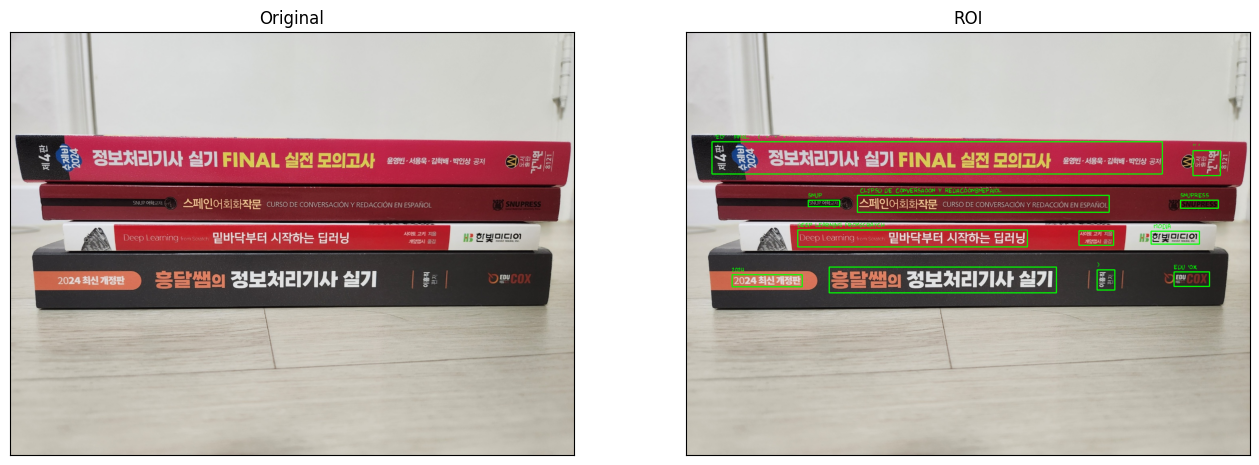

["권가포 'eO' 정보처리기사 실기 FINAL, 설진 모의교사 속( 운영빈 - 서용욱 - 김학배 -박인상 공저",
 "해'' 더머'",
 '스페인어회화작문 CLJPSD DE CONVERSAOON Y REDACOONBNEPAiOL',
 'SNUP 어학교재',
 'SNUPRESS',
 'Deep Learning fromscratch 밑바닥부터 시작하는 딥러닝',
 '사이토 고키 지음 개임엽시 옮김',
 '한빛미디이 Modia',
 '용달샘의 정보처리기사 실기',
 '소) 소포',
 "EDU 'OX",
 '2024 최신개정판']

In [7]:
from main import PororoOcr

ocr = PororoOcr()

img_path = 'assets/images/ver.jpg'

# 오류나면 폰트 수정
ocr.run_ocr(img_path, debug=True)

## YOLO + PORORO

In [12]:
!pip install ultralytics #YOLO8 설치(코랩)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 26.0 MB/s eta 0:00:00



0: 480x640 5 books, 16.5ms
Speed: 2.8ms preprocess, 16.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
책 0 이미지가 book_0.jpg에 저장되었습니다.
책 1 이미지가 book_1.jpg에 저장되었습니다.
책 2 이미지가 book_2.jpg에 저장되었습니다.
책 3 이미지가 book_3.jpg에 저장되었습니다.
책 4 이미지가 book_4.jpg에 저장되었습니다.


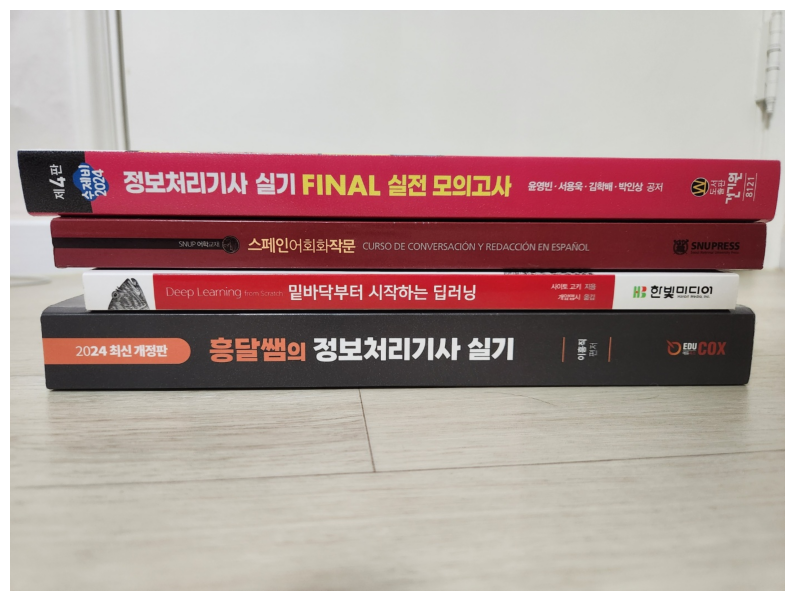

In [17]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# 이미지 읽기
img_path = 'assets/images/ver.jpg'  # 감지할 책 이미지 경로
image = cv2.imread(img_path)

# YOLOv8 모델 로드 (사전 학습된 모델 사용)
model = YOLO('yolov8s.pt')  # YOLOv8s 모델 파일 로드

# 객체 감지 수행 (책 감지)
results = model(image)  # 이미지에 대해 객체 감지 수행

# 감지된 객체들의 바운딩 박스 정보
boxes = results[0].boxes  # 바운딩 박스 정보

# 감지된 책을 하나씩 잘라내기
for i, box in enumerate(boxes):
    # 바운딩 박스 좌표 추출 (x1, y1, x2, y2)
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # 좌표 정보를 정수로 변환

    # 책 이미지 잘라내기
    book_image = image[y1:y2, x1:x2]

    # 잘라낸 책 이미지 저장
    cropped_image_path = f'book_{i}.jpg'  # 각 책에 대한 이미지 파일 경로
    cv2.imwrite(cropped_image_path, book_image)
    print(f"책 {i} 이미지가 {cropped_image_path}에 저장되었습니다.")

# 원본 이미지 표시 (matplotlib 사용)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


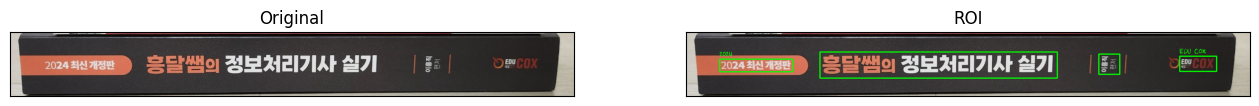

book_1.jpg의 OCR 결과: 응달샘의 정보처리기사 실기


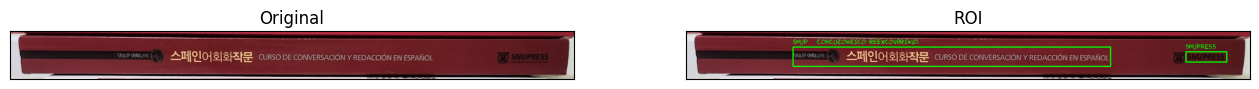

book_2.jpg의 OCR 결과: SNUP 어학교재 스페인어흐트작문 concuzowesco reexcovarswio.


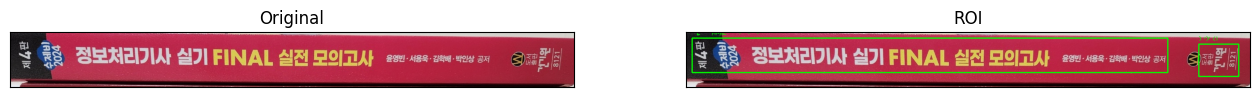

book_0.jpg의 OCR 결과: 권가도 'E' 정보처리기사 실기 FINAL 실전 모의고사 운영빈 - 서용욱 - 김학배 -박인상 공저


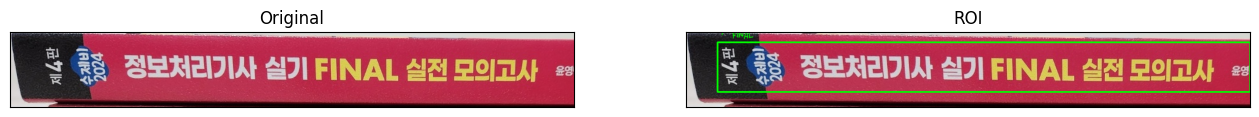

book_3.jpg의 OCR 결과: 금기도 '보처리기사 실기 FINAL 실전 모의고사 윤영


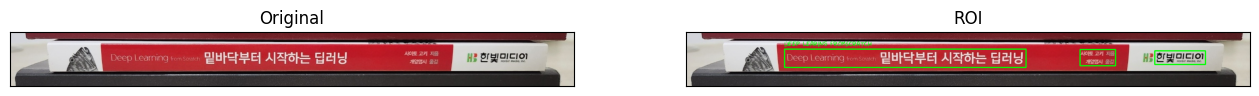

book_4.jpg의 OCR 결과: Deep Learing fromscratch 밑바닥부터 시작하는 딥러닝


In [18]:
import cv2
from main import PororoOcr
import os

# OCR 객체 생성
ocr = PororoOcr()

# 저장된 책 이미지 폴더 경로
books_folder = './'  # 현재 디렉토리에서 책 이미지 찾기
book_images = [f for f in os.listdir(books_folder) if f.startswith('book_') and f.endswith('.jpg')]

# 각 책 이미지에 대해 OCR 실행
for book_image in book_images:
    # 책 이미지 경로
    image_path = os.path.join(books_folder, book_image)

    # 이미지 읽기
    book_img = cv2.imread(image_path)

    # OCR 실행
    ocr_results = ocr.run_ocr(image_path, debug=True)  # OCR 결과 얻기

    # OCR 결과 출력
    print(f"{book_image}의 OCR 결과: {ocr_results[0]}")  # 첫 번째 요소 출력 (추출된 텍스트)




0: 480x640 5 books, 15.6ms
Speed: 2.9ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


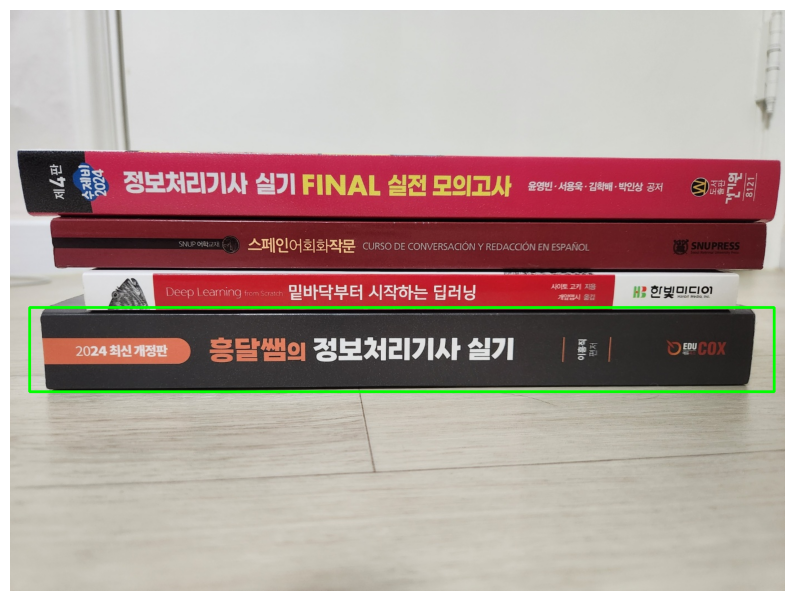

In [19]:
import cv2
from ultralytics import YOLO
from main import PororoOcr
import matplotlib.pyplot as plt
import os

# 원본 이미지 읽기
original_img_path = 'assets/images/ver.jpg'  # 원본 이미지 경로
original_image = cv2.imread(original_img_path)

# YOLOv8 모델 로드
model = YOLO('yolov8s.pt')
results = model(original_image)  # 원본 이미지에서 객체 감지

# OCR 객체 생성
ocr = PororoOcr()

# 책 제목 찾기
target_title = "응달샘의 정보처리기사 실기"

# 객체 감지 결과에서 바운딩 박스 정보 얻기
boxes = results[0].boxes

# 바운딩 박스와 OCR 결과를 확인하여 일치하는 책 제목 찾기
for i, box in enumerate(boxes):
    # 바운딩 박스 좌표 추출
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())

    # 책 이미지 잘라내기
    book_image = original_image[y1:y2, x1:x2]

    # OCR 실행
    ocr_results = ocr.run_ocr(book_image, debug=False)  # OCR 결과 얻기
    extracted_text = ocr_results[0]  # 첫 번째 요소에서 텍스트 추출

    # 텍스트 매칭 확인
    if target_title in extracted_text:
        # 바운딩 박스 표시
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # 초록색 박스

# 결과 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
